In [79]:
import numpy as np

from sklearn.manifold import TSNE
from sklearn.datasets import load_digits, load_iris, load_breast_cancer
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

In [28]:
def plot_projections(projections, targets, ax):
    n_classes = len(np.unique(targets))
    
    palette = np.array(sns.color_palette("hls", n_classes))

    ax.scatter(projections[:, 0], projections[:, 1], c=palette[targets])

Let $ x_i \in \mathbb{R}^D $ and $ y_i \in \mathbb{R}^2 $.

Construct map: $x_i \rightarrow y_i$.

Consider for each $i$ and $j$ following value:
$$
    p_{j|i} = \frac{ \exp \left\{ - \| x_i - x_j \|^2 \: \big/ \: 2\sigma_i^2 \right\} }
                   { \sum_{k \neq i} \exp \left\{ - \| x_i - x_k \|^2 \: \big/ \: 2\sigma_i^2 \right\} }
$$

This measures how close $x_j$ is from $x_i$ (Gaussian distribution around $x_i$ with a given variance $σ_i^2$). 

Then similarity between $x_i$ and $x_j$ is given by:
$$
    p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$

And similarity between $y_i$ and $y_j$:
$$
    q_{j|i} = \frac{f( \left\| x_i - x_j \right\| )}
                  {\sum_{k \neq i} f( \left\| x_i - x_k \right\|)},              
$$
where f(z) is t-Student distribution with one degree of freedom.

So, we have two distributions. Let's consider Kullback-Leibler divergence between $p_{ij}$ and $q_{ij}$:
$$
    KL(P \: || \: Q) = \sum_{i, j} p_{ij} \, \log \frac{p_{ij}}{q_{ij}}.
$$

## Digits

In [ ]:
digits = load_digits()

X = digits['data']
y = digits['target']

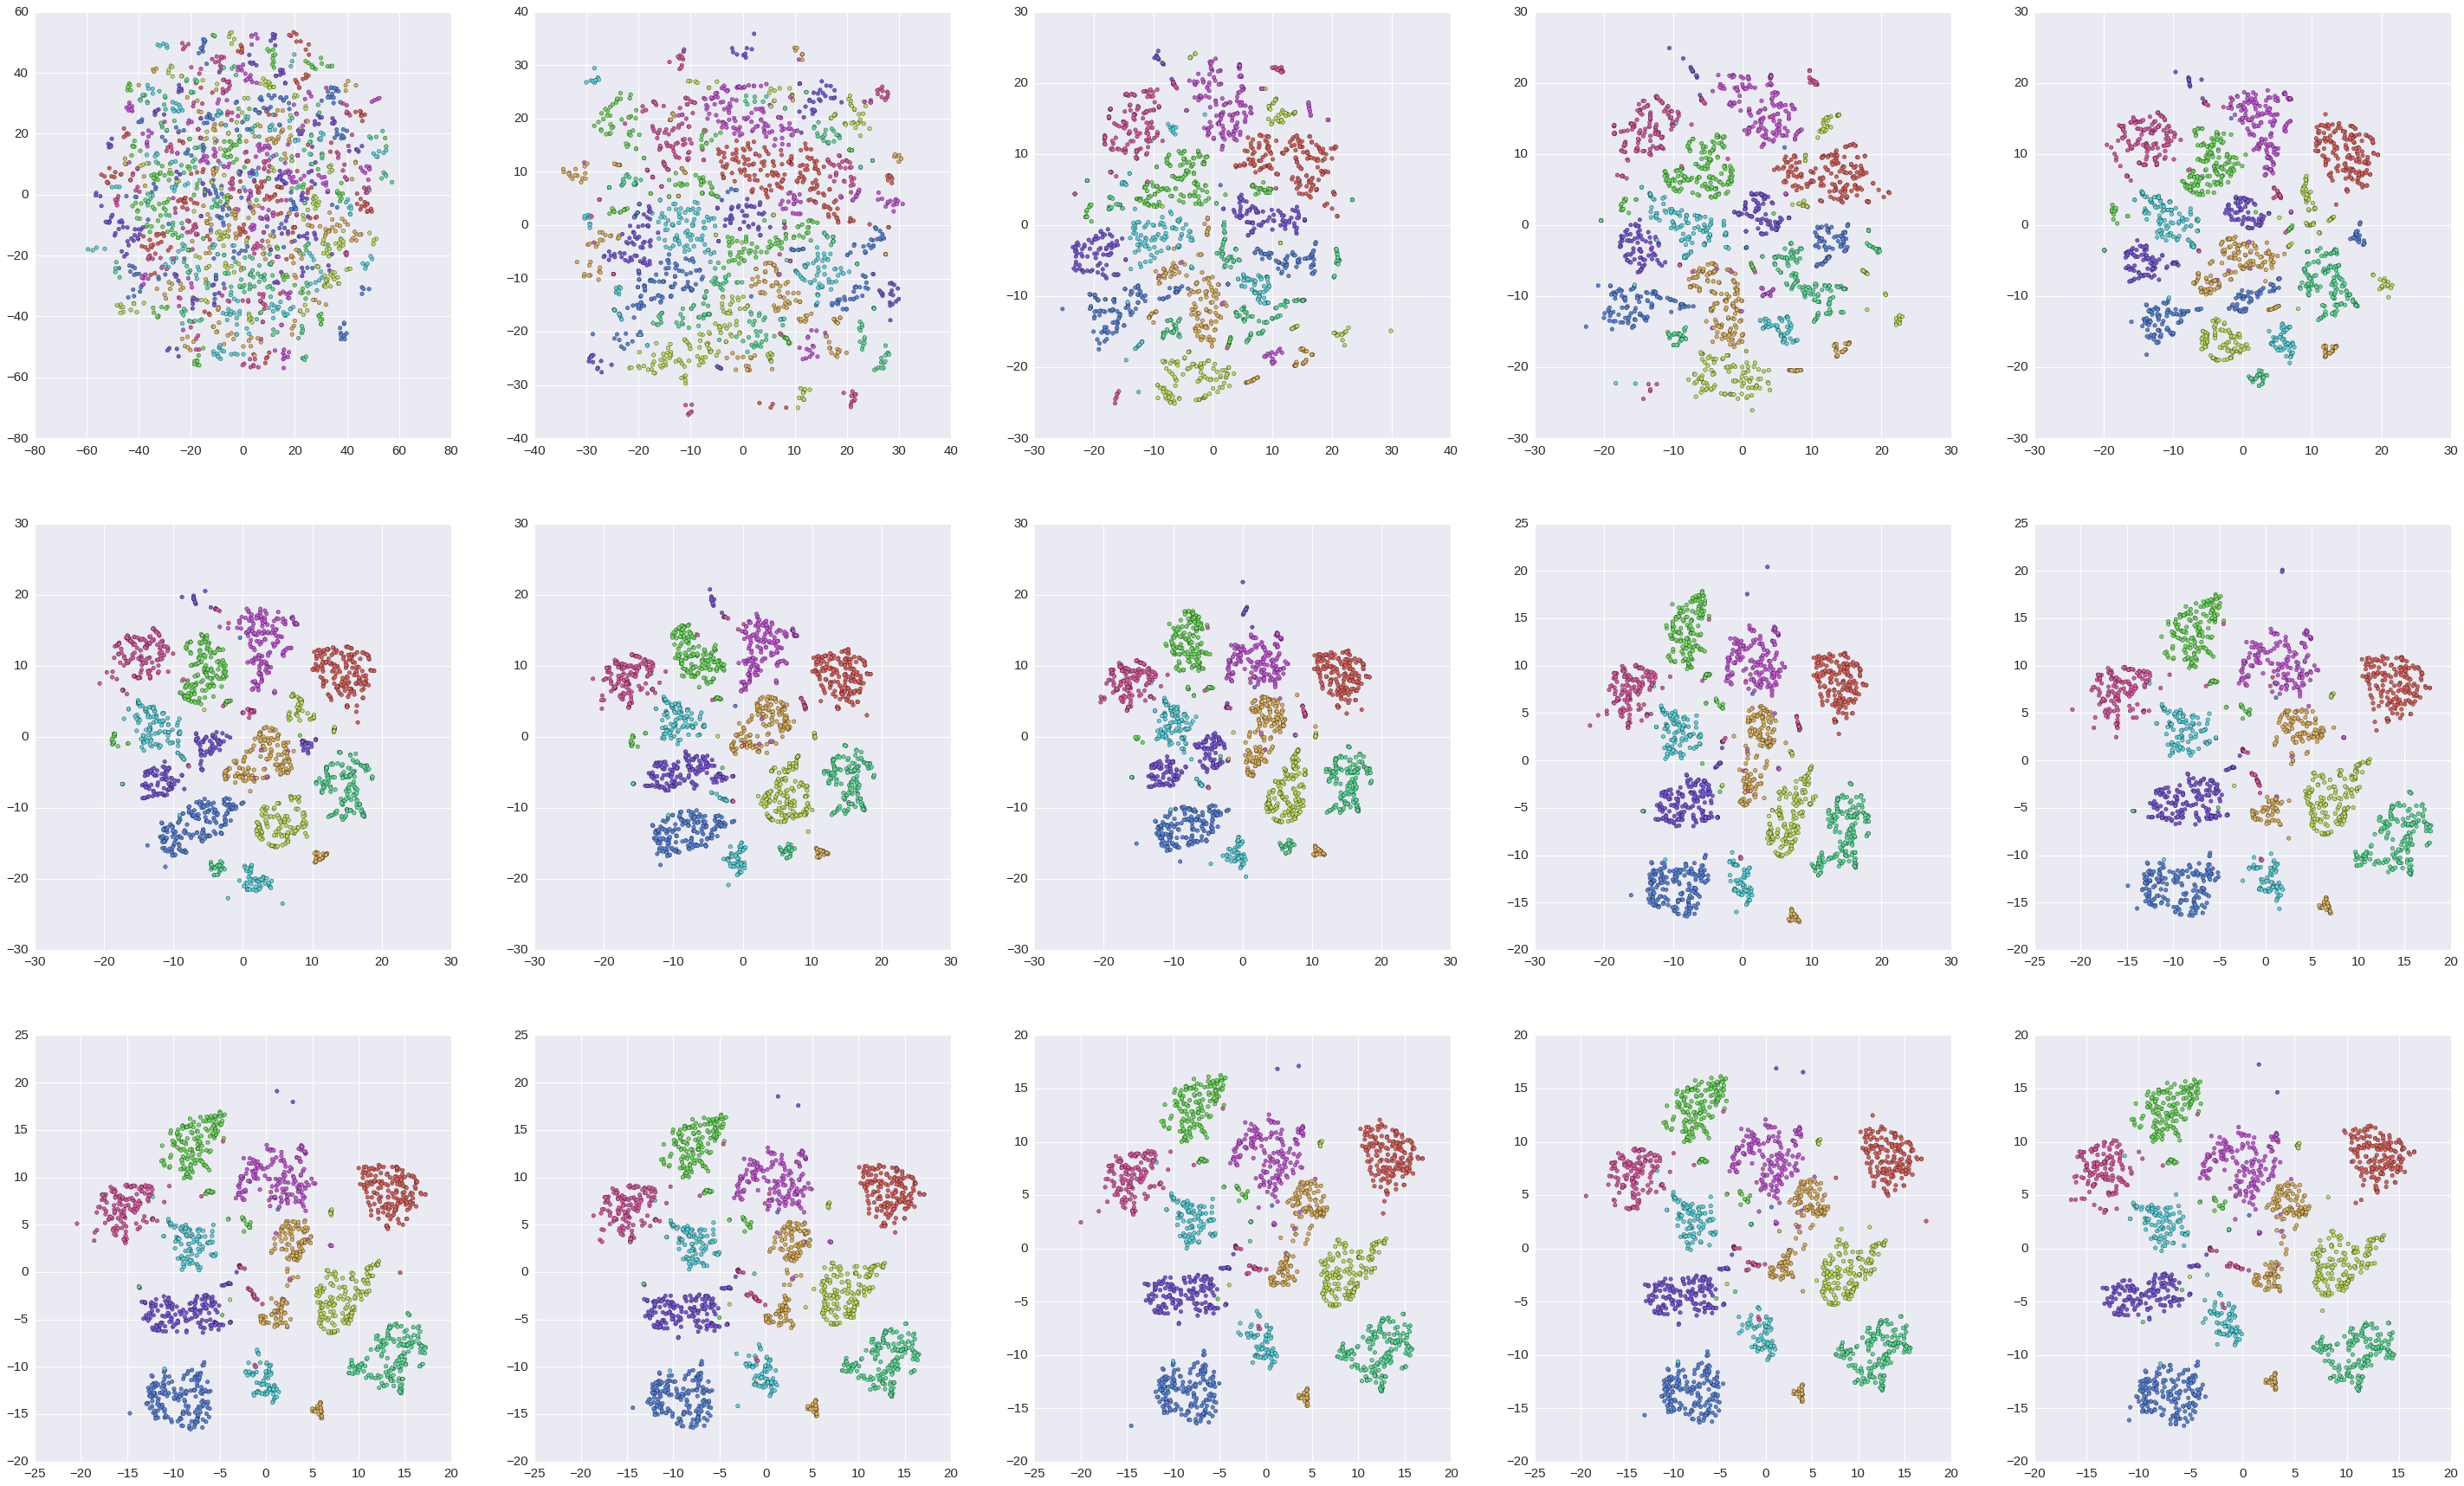

In [47]:
perplexities = np.linspace(1, 50, 15).astype(int)

grid_dims = np.array((3, 5))

fig, axes = plt.subplots(
    nrows=grid_dims[0],
    ncols=grid_dims[1], 
    figsize=grid_dims[::-1] * 10
)

for n, perplexity in enumerate(perplexities):
    i, j = np.unravel_index(n, grid_dims)
    
    X_proj = TSNE(perplexity=perplexity, random_state=45).fit_transform(X)
    
    plot_projections(X_proj, y, axes[i, j])
    
fig.savefig('digits_tsne-generated.png', dpi=120)

## Iris

In [50]:
irises = load_iris()

X = irises['data']
y = irises['target']

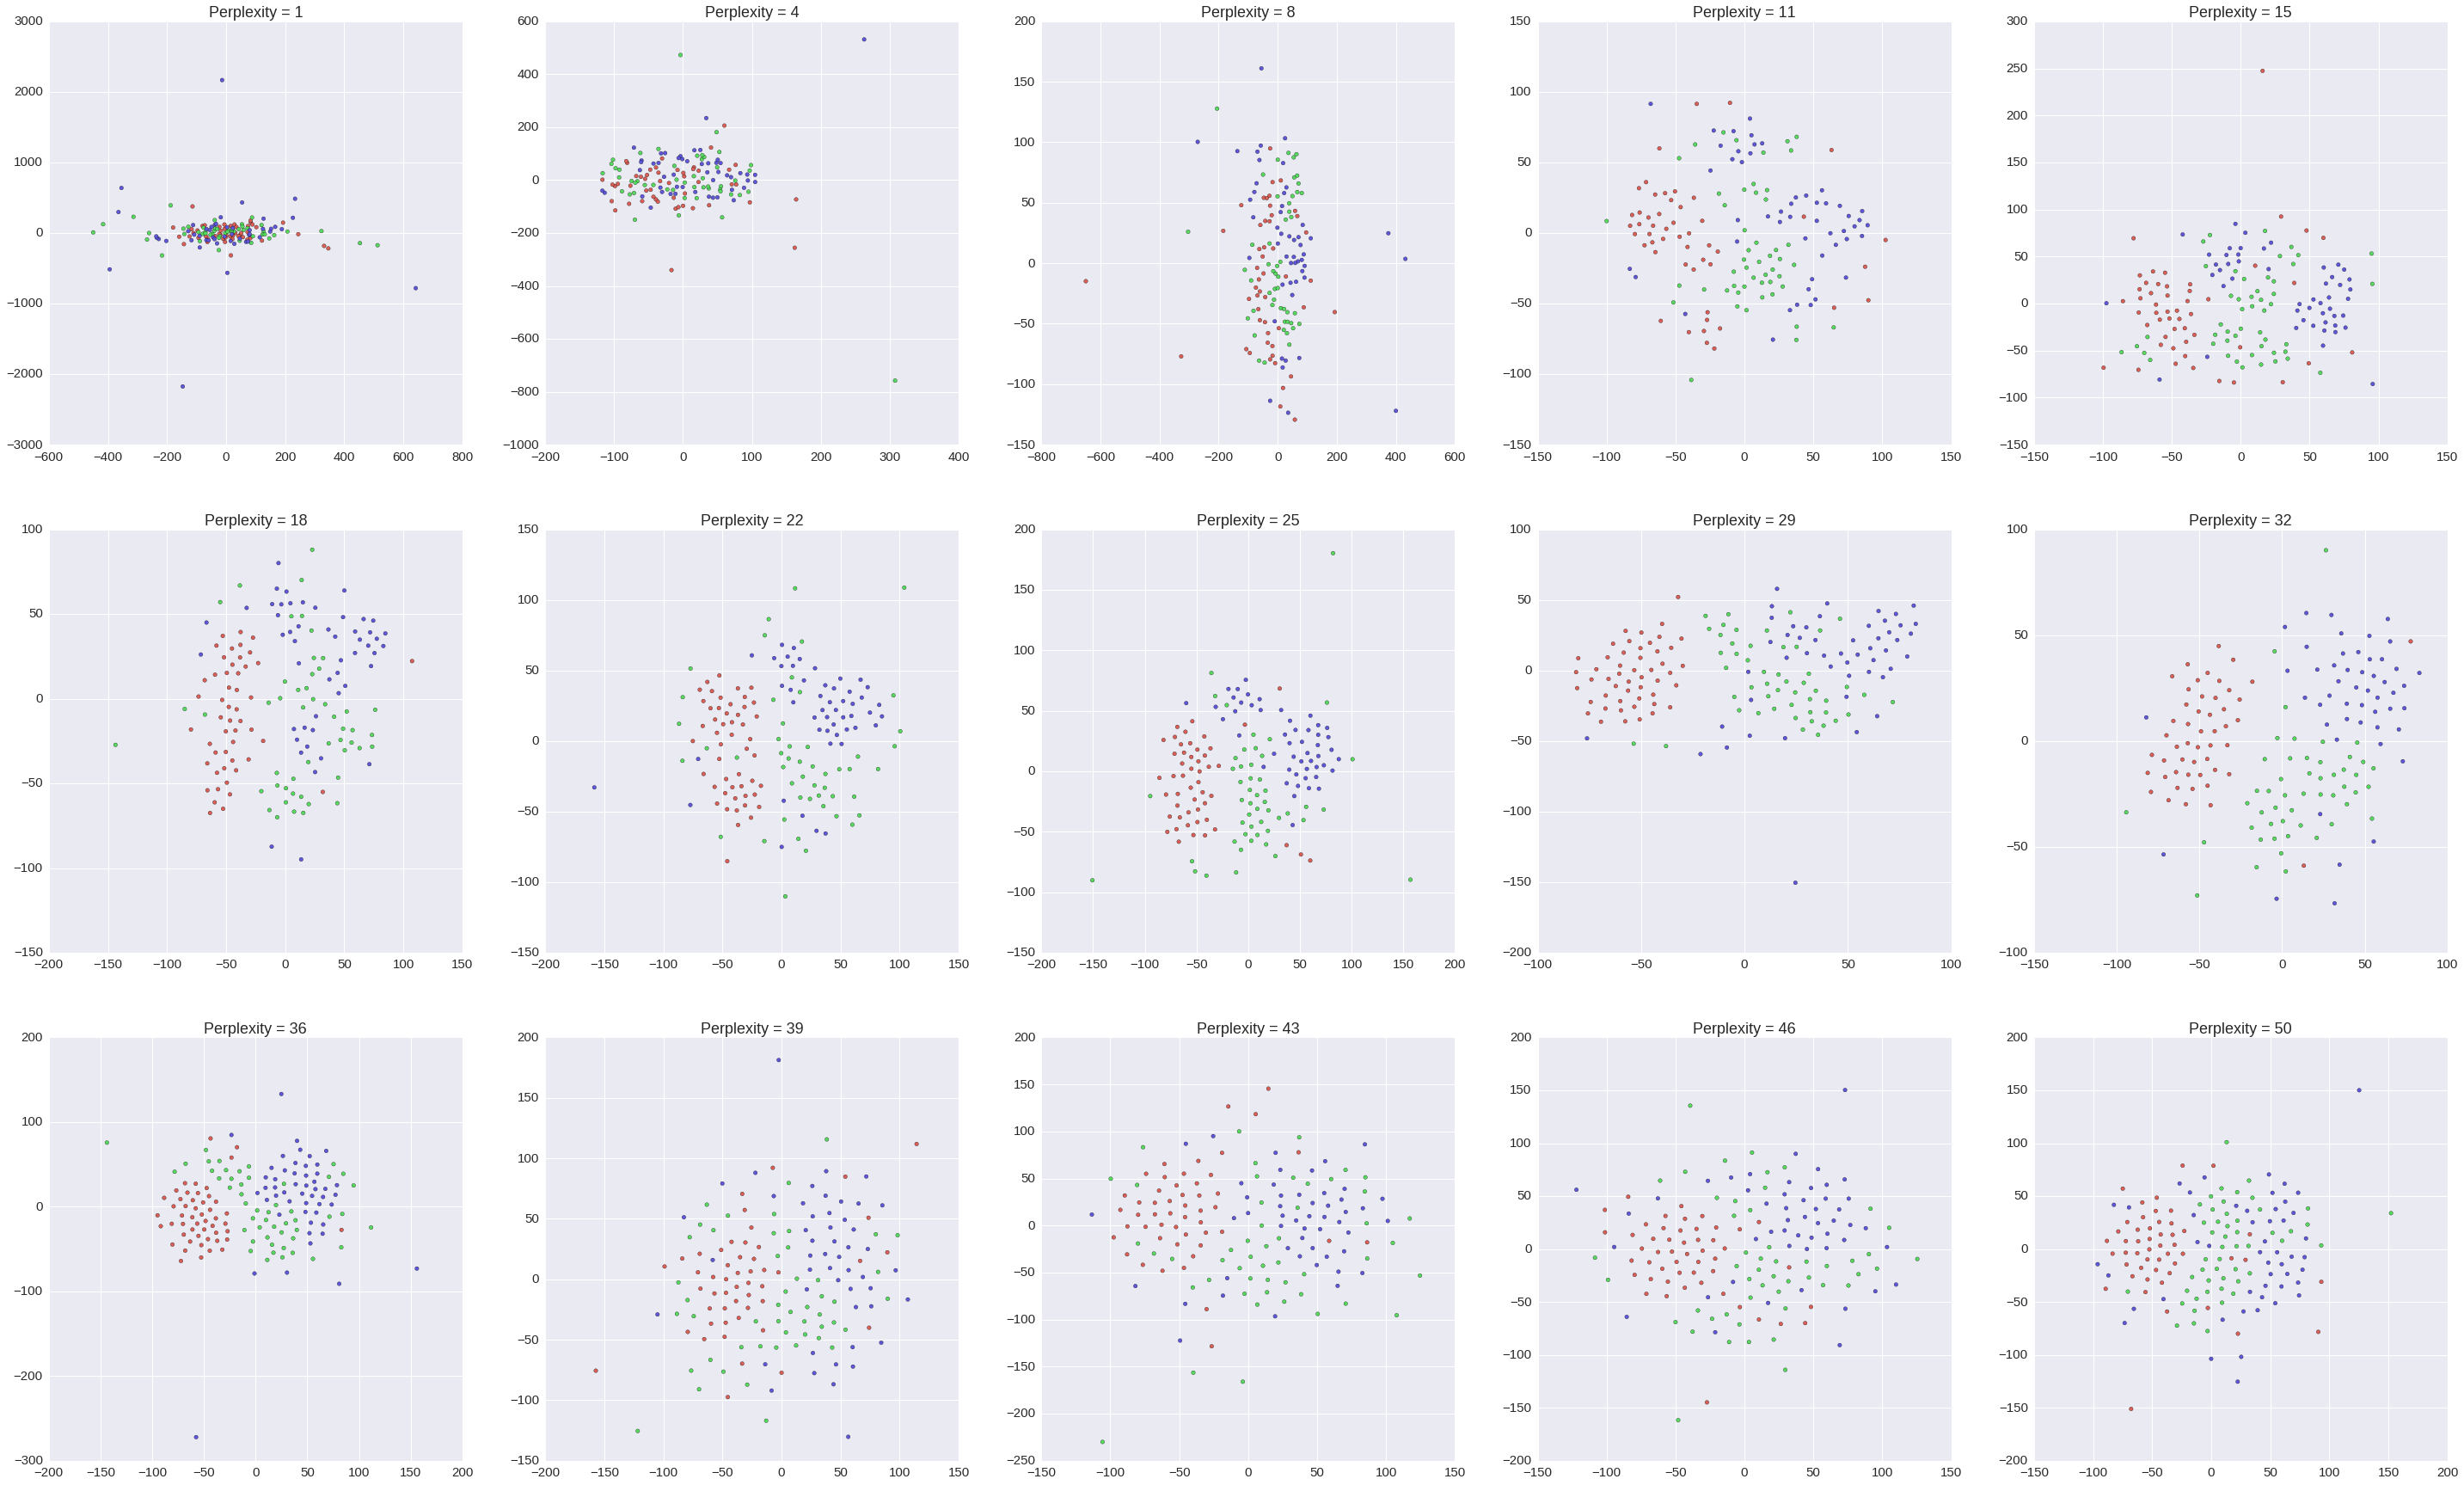

In [75]:
perplexities = np.linspace(1, 50, 15).astype(int)

grid_dims = np.array((3, 5))

fig, axes = plt.subplots(
    nrows=grid_dims[0],
    ncols=grid_dims[1], 
    figsize=grid_dims[::-1] * 10
)

for n, perplexity in enumerate(perplexities):
    i, j = np.unravel_index(n, grid_dims)
    
    X_proj = TSNE(perplexity=perplexity, learning_rate=1200, random_state=45).fit_transform(X)
    
    axes[i, j].set_title("Perplexity = %d" % perplexity)
    
    plot_projections(X_proj, y, axes[i, j])
    
fig.savefig('digits_tsne-generated.png', dpi=120)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.447880
[t-SNE] Iteration 25: error = 2.1781523, gradient norm = 0.0698632
[t-SNE] Iteration 50: error = 2.0847921, gradient norm = 0.0029568
[t-SNE] Iteration 75: error = 1.8016198, gradient norm = 0.0019994
[t-SNE] Iteration 100: error = 1.6487688, gradient norm = 0.0018476
[t-SNE] Error after 100 iterations with early exaggeration: 1.648769
[t-SNE] Iteration 125: error = 1.4450405, gradient norm = 0.0017941
[t-SNE] Iteration 150: error = 1.3380280, gradient norm = 0.0017030
[t-SNE] Iteration 175: error = 1.3037322, gradient norm = 0.0016568
[t-SNE] Iteration 200: error = 1.2939005, gradient norm = 0.0017035
[t-SNE] Iteration 225: error = 1.2909600, gradient norm = 0.0017165
[t-SNE] Iteration 250: error = 1.2901709, gradient norm = 0.0017192
[t-SNE] Iteration 275: error = 1.2899494, gradient norm = 0.0017200
[t-SNE] Ite

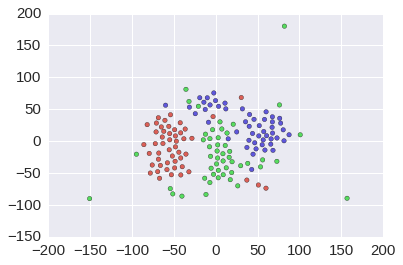

In [77]:
ax = plt.axes()

tsne = TSNE(perplexity=25, learning_rate=1200, random_state=45, verbose=2)

X_proj = tsne.fit_transform(X)
    
plot_projections(X_proj, y, ax)